In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/support2.csv')


In [ ]:
num_cols = [x for x in df.select_dtypes(include=np.number)]
cat_cols = [x for x in df.select_dtypes(exclude=np.number)]
print("There are", len(num_cols), "numerical columns and", len(cat_cols), "categorical columns in the dataset\n")
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

There are 39 numerical columns and 8 categorical columns in the dataset

Numerical columns: ['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'adlsc']
Categorical columns: ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2']


In [ ]:

df_clas = df.drop(['hospdead', 'sfdm2'], axis = 1)
df_clas

,age,death,sex,slos,d.time,dzgroup,dzclass,num.co,edu,income,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
1,62.84998,0,male,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,...,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000
2,60.33899,1,female,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,...,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000
3,52.74698,1,female,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,...,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000
4,42.38498,1,female,3,133,Lung Cancer,Cancer,2,11.0,under $11k,...,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.000000
5,79.88495,0,female,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,...,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,66.07300,0,male,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,...,0.399963,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000
9102,55.15399,0,female,29,347,Coma,Coma,1,11.0,NaN,...,NaN,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000
9103,70.38196,0,male,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,...,0.399963,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391
9104,47.01999,1,male,7,7,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,...,0.399963,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000


In [ ]:
df_clas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   slos      9105 non-null   int64  
 4   d.time    9105 non-null   int64  
 5   dzgroup   9105 non-null   object 
 6   dzclass   9105 non-null   object 
 7   num.co    9105 non-null   int64  
 8   edu       7471 non-null   float64
 9   income    6123 non-null   object 
 10  scoma     9104 non-null   float64
 11  charges   8933 non-null   float64
 12  totcst    8217 non-null   float64
 13  totmcst   5630 non-null   float64
 14  avtisst   9023 non-null   float64
 15  race      9063 non-null   object 
 16  sps       9104 non-null   float64
 17  aps       9104 non-null   float64
 18  surv2m    9104 non-null   float64
 19  surv6m    9104 non-null   float64
 20  hday      9105 non-null   int64  
 

Real data: death
1    6201
0    2904
Name: count, dtype: int64
Percentage values: death
1    68.105437
0    31.894563
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribution of classes'}>

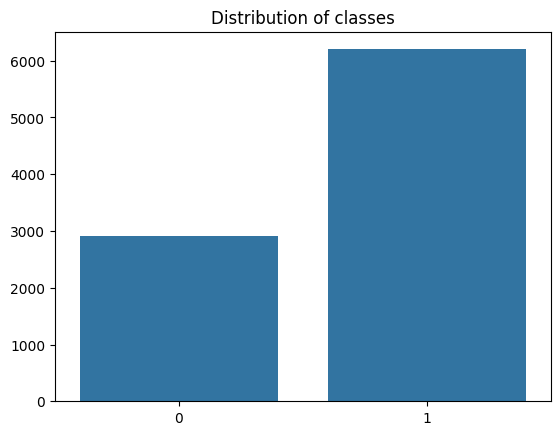

In [ ]:
# Target values
print('Real data:', df_clas['death'].value_counts())
print('Percentage values:', df_clas['death'].value_counts(normalize = True)*100) # Calculating relative frequencies

# Distribution of classes: Death (1) or Not Death (0)
unique, counts = np.unique(df_clas[['death']], return_counts=True)
plt.title('Distribution of classes')
sns.barplot(x=unique, y=counts)

In [ ]:
features = df_clas.drop('death', axis = 1)
targets = df_clas['death']

# Encode our targets using one-hot encoding
targets_onehot = pd.get_dummies(targets)
targets_onehot.head()


,0,1
1,True,False
2,False,True
3,False,True
4,False,True
5,True,False


In [ ]:
features_onehot = pd.get_dummies(features)
features_onehot.shape

(9105, 66)

In [ ]:
features_onehot = features_onehot.astype('float32')
targets_onehot = targets_onehot.astype('float32')
#features_onehot.info()

In [ ]:
# Checking for NaN values in targets_onehot
nan_check_targets = targets_onehot.isna().sum()
#print("\nNaN values in targets_onehot:\n", nan_check_targets)

# Checking for NaN values in features_onehot
nan_check_features = features_onehot.isna().sum()

# Displaying features with NaN values
features_with_nan = nan_check_features[nan_check_features > 0]
#print("\nFeatures with NaN values:\n", features_with_nan)

In [ ]:
# Impute NaN values in numerical columns with mean
features_onehot = features_onehot.apply(lambda col: col.fillna(col.mean()) if col.dtype == 'float32' else col)

# Impute NaN values in categorical columns
features_onehot = features_onehot.fillna('Unknown')

In [ ]:
train_features, test_features, train_targets, test_targets = train_test_split(features_onehot, targets_onehot, test_size=0.2, stratify=targets)

In [ ]:
print('Number of samples in the test set:', len(test_targets))
print('Number of classes in the classification problem:', len(set(targets)))

Number of samples in the test set: 1821
Number of classes in the classification problem: 2


In [ ]:
rf_model = RandomForestClassifier(random_state=42,max_depth=2)
D_tree = DecisionTreeClassifier(random_state=42)
LR = LogisticRegression(max_iter=1000,random_state=42)



In [ ]:
rf_model.fit(train_features, train_targets)
pred = rf_model.predict(test_features)
acc = accuracy_score(test_targets,pred)
print('Độ chính xác bằng phương pháp RandomForest :', acc*100,'%')

Độ chính xác bằng phương pháp RandomForest : 78.14387699066447 %


D_tree.fit(train_features, train_targets)
pred1 = D_tree.predict(test_features)
acc1 = accuracy_score(test_targets,pred)
acc1

In [ ]:
D_tree.fit(train_features, train_targets)
pred1 = D_tree.predict(test_features)
acc1 = accuracy_score(test_targets,pred1)
print('Độ chính xác phương pháp DecisionTreeClassifier:', acc1*100,'%')



Độ chính xác phương pháp DecisionTreeClassifier: 90.82921471718835 %


In [ ]:

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

LR.fit(train_features_scaled, train_targets[1])
pred2 = LR.predict(test_features_scaled)
acc2 = accuracy_score(test_targets[1], pred2)
print('Độ chính xác phương pháp LogisticRegression:', acc2*100,'%')

Độ chính xác phương pháp LogisticRegression: 85.11806699615596 %
